<font size='10' color = 'E3A440'>**Pre-conference Workshop on Python**</font>
=======

<font color = 'E3A440'>*Pratical introduction to the analysis of unstructured data*</font>
=============

This tutorial is a short hands-on workshop to introduce the analysis of unstructured data for innovation studies. 

Structure of the workshop:
1. Presentation of sections 1 and 2 in a plenary mode (20 minutes)
2. Individual work on sections 2 and 3 (20 minutes)
3. Group work on section 4 (60 minutes)
4. Plenary session with the group presentation (20 minutes)

This tutorial cannot be considered exhaustive of the domain of textual data analysis. 

### Authors: 
- Mikaël Héroux-Vaillancourt <mikael.heroux-vaillancourt@polymtl.ca>
- Davide Pulizzotto <davide.pulizzotto@polymtl.ca>
- Pietro Cruciata <pietro.cruciata@polymtl.ca>
- Geneviève Ratelle <genevieve.ratelle@gmail.com> 

### Table of Contents

- [Section 0. Introduction](#introduction)
- [Section 1. Data Pre-Processing](#pre-processing)
- [Section 2. Descriptive statistics](#desc-stat)
- [Section 3. Analysis](#analysis)
- [Section 4. Exercise](#exercie)

<a id='introduction'></a>
# <font size = '6' color='E3A440'>Section 0. Introduction</font>

This workshop is based on the research work of **Mikaël Héroux-Vaillancourt** presented at the [P4IE Conference - Measuring Metrics that Matter](https://event.fourwaves.com/p4ie/pages), which will take place  on 9-10-11 May 2022 at the *Hilton Garden Inn*, in Ottawa.

Here the [link]() to get the presentation of Mikaël Héroux-Vaillancourt.

In order to succeed in this workshop, a few concepts have to be underlined:

1. This study is an exploratory analysis of several companies which obtained a [BCorp certification](https://www.bcorporation.net/en-us/).
2. The data analyzed come from a web scraping step of the snapshots found on [Wayback Machine](https://archive.org/web/) of all those companies of point 1.
3. The main objective is to group the B Corp companies by similarities between their key activities.

### Abstract of the Study
In this exploratory study, we used the web content of 1,110 enterprises audited and certified as B Corp to better understand the context that would lead organizations to undertake this process. After scraping and cleaning the data, we processed it in order to  generate clusters using the k-means algorithm. Our results show 20 clusters where we can easily see key activities, sectors and B Corp signalling. This is intended as an introduction to NLP tools to hopefully be used as an inspiration for your own research.

### Glossary of the workshop

Below is a list of some terms used in this workshop:

1. <font color='E3A440'><b>Dataframe</b></font>: a data structure that organizes data into a 2-dimensional table of rows and columns
2. <font color='E3A440'><b>Metadata</b></font>: it is information about an unstructured block of data (i.e., the author of a paper is metadata of the text of that paper).
3. <font color='E3A440'><b>Token</b></font>: each sequence of character which constitutes an independent linguistic unit, that is a word (i.e., each occurrence of the verb eat is a different token).
4. <font color='E3A440'><b>Type</b></font>: The unique string of character which represents several occurrences of the same linguistic unit or word (i.e., the string 'eat' is the type for each token of the verb to eat).
5. <font color='E3A440'><b>POS tag</b></font>:  a process which aims to assign parts of speech to each word of a given text
6. <font color='E3A440'><b>Stopwords</b></font>: it refers to words that are very low semantic content such as articles (the, an), modals (would, must), etc. 
7. <font color='E3A440'><b>Lemmatization</b></font>: a process that reduces the inflected words properly ensuring that the root word belongs to the language
8. <font color='E3A440'><b>Document-Term matrix</b></font>: it is a matrix where rows represent segments of text and columns are filled by linguistic features of those segments of text.
9. <font color='E3A440'><b>Weighting</b></font>: it is the weight a mathematical function provides for each linguistic feature of each segment of text (i.e., Term frequency, Tf-Idf, BM25, etc.)
10. <font color='E3A440'><b>K-means clustering</b></font>: an unsupervised statistic method aiming to partition *n* observations into *k* clusters based on their proximity to the centroid.


### Some Basic Concepts
The main step in text mining is to convert unstructured textual data into a mathematical model to be used in statistical learning. Thus, we need to create a <font color='E3A440'>**Document-Term matrix**</font>, a matrix $n \times w$, where $n$ is the number of text segments and $w$ is the number of textual features selected.The textual feature can have different nature. In the simplest model, these features correspond to the set of types that resume each token of the corpus. In other terms, $w$ is the number of features that characterize a segment of text. The matrix is generally represented as follows:  
 
$$X = \begin{bmatrix} 
x_{11} & x_{12} & \ldots & x_{1w} \\
\vdots & \vdots       &  \ddots      & \vdots \\ 
x_{n1} & x_{12} & \ldots & x_{nw} \\
\end{bmatrix}
$$ 
 
\\
When we apply a <font color='E3A440'>**clustering algorithm**</font> to this matrix, we want to group rows in a homogeneous set of clusters. This means to minimize the intra-class inertia or the pairwise squared deviations of points in the same cluster:

$$ \underset{s}{\arg\min}\sum_{i=1}^{k}\frac{1}{\vert S_i\vert}\sum_\limits{x,y \in S_i}\Vert x-y \Vert^2$$

This kind of algorithms aims to create a vector $Y$ of size $n$, containing the <font color='E3A440'>**cluster label**</font> assigned to each segment of text from $1$ to $k$.

$$
Y = \begin{bmatrix} 
c_1 \\
c_2 \\
\vdots \\ 
c_n
\end{bmatrix}$$

Thus, $Y_1$ corresponds to the cluster label given at $X_1$. Generally, $k$ is the main parameters of a clustering algorithm which represents the number of cluster into which group text segments.

## 0.1 Preparation of Colab Virtual Machine

In order to work correctly on Colab, we need to prepare the environment by executing two main steps:
1. Download data from the GitHub project 
2. Install packages to run code of this workshop

In [ ]:
# Downloading of data from the GitHub project
!rm -rf TEST_PRECONFERENCE/
!git clone https://github.com/puli83/TEST_PRECONFERENCE

In [52]:
# Installation of packages
!pip install pickle5
!pip install nltk
!python -m spacy download en_core_web_sm
!pip install emoji --upgrade

     |████████████████████████████████| 12.0 MB 5.2 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
     |████████████████████████████████| 175 kB 5.3 MB/s 
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171046 sha256=9d7f57b6c568bb49b1b58ecafc4ae45b8441cd691b41409d9b03d7c0eb8381f3
  Stored in directory: /root/.cache/pip/wheels/8a/4e/b6/57b01db010d17ef6ea9b40300af725ef3e210cb1acfb7ac8b6
Successfully built emoji


## 0.2 Import packages

We import the following packages that contain the functions needed to accomplish our task: 
- `re` package for REGEX
- `matplotlib` package for plotting
- `numpy` package for mathematical operations and data optimization
- `pandas` package for the manipulation of data 
- `sklearn` (scikit-learn) package for machine learning modelling
- `spacy` package for Natural Language Processing, containing pre-trained models
- `nltk` package for Natural Language Processing, including over 50 corpora, and several other resources 

In [53]:
import pandas as pd
import numpy as np
import scipy
import datetime
import time
import re
import os
import emoji
import pickle5 as pickle
import spacy
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

## 0.3 Definition of custom functions
In the next chunk of code, we define the functions that we need to reach the goal of the workshop. These functions will not be explained in detail since their comprehension is not essential to complete the workshop.

In [50]:
def prepare_data_for_WC(DTM, vocabulary_dtm):
    # compute total frequency for each word
    values_words = sum(DTM)
    #values_words = sum(tfidf_matrix)
    # verify type result and prepare data for wordcloud
    if type(values_words) is np.ndarray:
        values_words = [float(value) for value in np.nditer(values_words)]
    elif type(values_words) is scipy.sparse.csr.csr_matrix:
        values_words = [float(value) for value in np.nditer(values_words.todense())]
    else:
        print("Matrix in argument DTM has to be one of these two data classes:  'scipy.sparse.csr.csr_matrix' or 'numpy.ndarray'")
    ##
    list_mots = sorted(vocabulary_dtm.items(), key= lambda x:x[1])
    list_mots = [word for (word,idx) in  list_mots]
    words = zip(list_mots, values_words)
    words = sorted(words, key= lambda x:x[1], reverse=True)
    ## prepare data structure for wordcloud
    result_for_WC = {}
    #iterating over the tuples lists
    for (key, value) in words:
        result_for_WC[key] = value
    #
    return result_for_WC

def lexical_keyness(DTM, cls_kmeans, vocabulary_vectorize, n_cluster = 0):
    import math
    # This code ref takes inspiration from this python module : https://pypi.org/project/corpus-toolkit/
    # and its main script:  https://github.com/kristopherkyle/corpus_toolkit/blob/master/corpus_toolkit/corpus_tools.py
    # which is based on this paper: https://aclanthology.org/J93-1003/

    cluster_keyness = n_cluster
    df_freq_target = pd.DataFrame(np.asarray(DTM[cls_kmeans.labels_ == cluster_keyness].sum(0).T).reshape(-1))#, columns = [word for (word,idx) in sorted(vectorized.vocabulary_.items(), key= lambda x:x[1])]))
    df_freq_target.index = [word for (word,idx) in sorted(vocabulary_vectorize.items(), key= lambda x:x[1])]
    df_freq_target.index
    df_freq_target.columns = ['freq1']
    df_freq_target['freq2'] = np.asarray(DTM[~(cls_kmeans.labels_ == cluster_keyness)].sum(0).T).reshape(-1)
    #
    df_freq_target['tot'] = df_freq_target['freq1'] + df_freq_target['freq2']
    #
    df_freq_target['freq1'] = df_freq_target['freq1'].apply(lambda x: 0.0000001 if x == 0 else x).astype(float)
    df_freq_target['freq2'] = df_freq_target['freq2'].apply(lambda x: 0.0000001 if x == 0 else x).astype(float)
    #
    df_freq_target['freq1_norm'] = df_freq_target['freq1']/df_freq_target['freq1'].sum() * 1000000
    df_freq_target['freq2_norm'] = df_freq_target['freq2']/df_freq_target['freq2'].sum() * 1000000
    #
    df_freq_target['fraction'] = df_freq_target['freq1_norm'] / df_freq_target['freq2_norm']
    df_freq_target['Log-likelihood Ratio'] = df_freq_target['fraction'].apply(math.log2)
    return df_freq_target

def Clustering_kmeans(DTM, reduce_lsa = False, n_comp_lsa= 300, n_clusters = 2,  **kwargs):
    """
    Paramaters:
    DTM;  Matrice to pass under sklearn classifiers
    n_clusters = 2; the number of cluster to generate.
    reduce_lsa = False; If True, a SVD is executed on the DTM before to execute the clustering
    n_comp_lsa= 300; Number of component to keep after SVD on DTM.
    **kwargs; Arguments for Kmeans method of sklearn.cluster. For exemple :
    random_state = 1234,
    max_iter = 300,
    n_init = 20,
    tol = .000001,
    init = "k-means++",
    n_jobs = -1,
    precomputeDistances = True
    """
    import datetime
    from sklearn.cluster import KMeans
    from sklearn import metrics
    from sklearn.pipeline import make_pipeline
    from sklearn.preprocessing import Normalizer
    
    ## dimensionality reduction
    if reduce_lsa == True:
        from sklearn.decomposition import TruncatedSVD
        svd = TruncatedSVD(n_comp_lsa,
                           n_iter = 100,
                           random_state = kwargs['random_state'])
        #
        X_lsa = svd.fit_transform(DTM)
        explained_variance = svd.explained_variance_ratio_.sum()
        print("Explained variance of the SVD step: {}%".format(
            int(explained_variance * 100)))
        #
        DTM = X_lsa
    # Normalize samples individually to unit norm. Scaling inputs to unit norms is a common operation for text classification or clustering for instance.
    DTM = Normalizer().transform(DTM)
    cls_kmeans = KMeans(n_clusters = n_clusters,
                        random_state = kwargs['random_state'],
                        max_iter = kwargs['max_iter'],
                        n_init = kwargs['n_init'],
                        tol = kwargs['tol'],
                        init = kwargs['init'])
    
    cluster_labels = cls_kmeans.fit_predict(DTM)
    ## silhouette
    silhouette_avg = metrics.silhouette_score(DTM, cluster_labels)
    print("For n_clusters = %i;\t The silhouette_avg is : %f5" %(n_clusters, silhouette_avg))
    #
    cls_kmeans.DTM_ = DTM
    return cls_kmeans

def wordcloud_par_cluster(wordcloud, DTM, cls_kmeans, vocab, first_n_words=10, figsize=(18, 16), fontsize=32, plot_wordcloud = True, lst_clust = [], title_in_plot = "Clust_"):

        """
        wordcloud; A WordCloud function.
        DTM; A Docuemnt-Term Matrix
        vocab; It is a vocabulary from skllarn vectorizer
        first_n_words = 10; How many words to print
        figsize = (18, 16); Size of the plot. (this is the argument of this line plt.figure(figsize=figsize))
        fontsize = 32; Size of title font
        lst_clust = []; The list of cluster to plot. If empty, all the clusters are plotted
        title_in_plot = "Clust_"; title to put on top of plot \n
        """
        import numpy
        import scipy
        
        if not lst_clust:
            lst_clust = list(range(cls_kmeans.n_clusters))

        for x in lst_clust:
            DTM_temp = DTM[cls_kmeans.labels_ == x]
            result_for_WC= prepare_data_for_WC(DTM_temp, vocab)
            ###
            if plot_wordcloud == True:
                plot = wordcloud.generate_from_frequencies(result_for_WC)
                plt.figure(figsize=figsize)
                plt.imshow(plot)
                plt.title(title_in_plot + str(x) + '  N. of documents=' + str(DTM_temp.shape[0]),
                        fontsize = fontsize,
                        bbox=dict(facecolor='red', alpha=0.5))
                plt.axis('off')
                plt.show()
            print(f"Most frequent words for cluster {x} of size {str(DTM_temp.shape[0])} docs: ", list(result_for_WC)[0:first_n_words])

def plot_data_by_cluster(DTM, cls_kmeans, figsize = (16,10) ):
    ## Reduction of dimension to 2 for visualisation reasons
    from sklearn.manifold import TSNE
    time_start = time.time()
    tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000,metric='cosine', learning_rate=10, random_state = 794)
    reduc_dim_results = tsne.fit_transform(DTM)
    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

    ## Create data structure for plotting
    df_reduction = pd.DataFrame()
    df_reduction['y'] =  cls_kmeans.labels_
    df_reduction['1-dim'] = reduc_dim_results[:,0]
    df_reduction['2-dim'] = reduc_dim_results[:,1]

    ## Generate the plot
    import seaborn as sns
    import colorcet as cc
    plt.figure(figsize = figsize)
    sns.scatterplot(data = df_reduction,
                    x="1-dim",
                    y="2-dim",
                    hue="y",
                    palette = sns.color_palette(cc.glasbey, n_colors = cls_kmeans.n_clusters),)

    plt.show()

def print_KWIC_clusters(data, DTM, cls_kmeans, vocab, k_to_analyze = 0, n_words = 3, n_segms_per_docuemnt = 5, n_documents = 3, left_windows = 50, right_windows = 50):
    DTM_temp = DTM[cls_kmeans.labels_ == k_to_analyze]
    result_for_WC= prepare_data_for_WC(DTM_temp, vocab)
    words = list(result_for_WC)[0:n_words]
    print(f"The following words are used for the Keyword In Context extraction: {words}")
    df_temp = data[data["cluster_labels"] == k_to_analyze].sort_values(by='Cosine_of_related_cluster', ascending= False).iloc[0:n_documents]
    for idx, row in df_temp.iterrows():
        n_company = row['company_name']
        for x in [f"Company : {n_company}." + f" Segment number: {str(y)}." + ' Segment: ' + '**'.join(x) for y,x in enumerate(re.findall("(.{0," + str(left_windows) +"})(" + "|".join(words)+ ")(.{0,"+ str(right_windows) + "})", row["text_web_page"]))][0:n_segms_per_docuemnt]:
            print(x)

## 0.4 Import data



The following code sets the path from which to import data.

In [5]:
ROOT_DIR='TEST_PRECONFERENCE/'
DATA_DIR=os.path.join(ROOT_DIR, 'Data')

---
We need to import the `.csv` file with the company’s data. The data is imported in a tabular format (such as MS Excel) called **dataframe** and managed by `pandas`. We named the variable containing data as follows `df_data_bcorp`

In [6]:
df_data_bcorp = pd.read_csv(os.path.join(DATA_DIR, 'BCorp_companies_Web_Data.csv'))

---
The dataset has *1110* rows and *129* columns.

In [ ]:
df_data_bcorp.shape

---
Further exploring some rows, we focus on two columns: 

+ **company_id** contains the domain of each BCorp companies under study
+ **text_web_page** contains a combination of all those pages founded in Wayback Machine for each company.

In [ ]:
df_data_bcorp.head()

---
Below, we give a list of some important metadata to explore:

In [ ]:
df_data_bcorp[['website', 'company_name', 'date_certified', 'description', 'industry','sector',
       'country', 'state', 'city', 'assessment_year', 'overall_score']]


# <font size = '6' color='E3A440'>Section 1: Data Pre-Processing </font>
This section presents the main aspects of a classical pre-processing step of textual data. The main objective of this step is to organize unstructured data into a structure that can be digestible in a statistical learning process. In other words, this process allows transforming the text into vectors and is divided into three main operations:
 1. Morphological Analysis
 2. Filter of lexical features
 3. Vectorization of lexical features

## 1.1 Cleaning of metadata
In this section, we provide a data cleaning step for our dataset. Since the state of Québec is written on two forms, one with accent and one without it, this issue generates two values for the same data.
Thus, we replace each "é"  with a simple "e".

In [7]:
df_data_bcorp['state'] = df_data_bcorp['state'].str.replace("é","e")

## 1.2 Morphological Analysis
An important operation during the pre-processing of unstructured textual data is to detect the **Morphological features** of words. This allows understanding of the roles that words have in their contexts. This operation is composed of two parts:
1. Part-of-Speech tagging, generally known as POS tagging
2. Lemmatisation, which consists in the reduction of a word to his lemma

These two sub-operations can be executed by different types of algorithms. We use a neural network pre-trained model using the module named `spacy`. In particular, we use the function `nlp.pipe()` to generate a list of preprocessed documents. This function has several arguments and it takes a list of string characters to be executed. Each element of this list is a textual segment or a document. 

In this first chunk of code, we load from `spacy` the pre-trained model  called <font color="#CE9178">en_core_web_sm</font> ([More info](https://spacy.io/models/en)).   

In [8]:
nlp = spacy.load('en_core_web_sm')

---
In this second chunk, we apply the NLP pipeline to our textual data contained in the **text_combined** column, and this, by using the `nlp.pipe()` function. 

Thus, we generate the `preprocessed_docs` variable, namely a list containing preprocessed text of all the documents. We can observe the first document with `preprocessed_docs[0]`, the second with `preprocessed_docs[1]`, the third with `preprocessed_docs[2]`, etc.

Each element of the list `preprocessed_docs`, contains a list of words analyzed with `spacy`.


In [9]:
t0 = datetime.datetime.now() # line of code to register a timestamp 
df_data_bcorp["text_preprocessed"] = list(nlp.pipe(df_data_bcorp["text_web_page"], disable = ["tok2vec",'parser','ner']))
print(str(datetime.datetime.now() - t0)) # line of code to print the elapsed time from t0

0:00:15.915094


---
In the next chunk, we look at the first document in his **original format**

In [ ]:
# Print first segment of the corpus
print(df_data_bcorp.iloc[0]["text_web_page"])

Explore how you can make every B2B purchase count towards UN's Sustainable Development Goals (SDGs). 17 Ways connects SDG impact companies and multinationals for purpose-driven purchasing. Post a need and choose suppliers based on the products or services they offer and on the SDG areas you want to impact. You can also choose to search/sort by certifications. Appropriate companies will be alerted about your opportunity, but your information will be kept secure so you can decide how to engage and you won't be overwhelmed by potential suppliers. Now it's easy to be found by companies looking to purchase from businesses that are aligned with the SDG areas your company is working to impact. And 17 Ways helps you connect with other like-minded companies to create partnerships and do business together. The UN's Sustainable Development Goals (SDGs) outline 17 Ways companies can contribute to a sustainable planet and society. All the companies on 17 Ways choose which of the SDGs align with the

---
Below, we look at the **preprocessed version** of this first document. In particular, we print three attributes for each word of the first document:
1. `word.text`, which corresponds to the original version of the word, which is called **token**.
2. `word.pos_`, which corresponds to the POS tag predicted for that word.
3. `word.lemma_`, which corresponds to the lemma of the token.

For pedagogical reasons, we only look at the first 10 words.


In [ ]:
# Print morphosyntactial analysis of the first sentence of the corpus. Each element is separeted by a vertitcal line |
for idx, word in enumerate(df_data_bcorp["text_preprocessed"].iloc[0]):
    print("Token: ", word.text, " | ", "POS tag: ", word.pos_," | ", "Lemma of the token: ", word.lemma_)
    # Break loop after first 10 words -> idx==10
    if idx == 10:
        break

Token:  Explore  |  POS tag:  VERB  |  Lemma of the token:  explore
Token:  how  |  POS tag:  ADV  |  Lemma of the token:  how
Token:  you  |  POS tag:  PRON  |  Lemma of the token:  -PRON-
Token:  can  |  POS tag:  VERB  |  Lemma of the token:  can
Token:  make  |  POS tag:  VERB  |  Lemma of the token:  make
Token:  every  |  POS tag:  DET  |  Lemma of the token:  every
Token:  B2B  |  POS tag:  NOUN  |  Lemma of the token:  b2b
Token:  purchase  |  POS tag:  NOUN  |  Lemma of the token:  purchase
Token:  count  |  POS tag:  NOUN  |  Lemma of the token:  count
Token:  towards  |  POS tag:  ADP  |  Lemma of the token:  towards
Token:  UN  |  POS tag:  PROPN  |  Lemma of the token:  UN


## 1.3 Filter of lexical features

In this section, we perform several pre-processing steps to transform the text to a format that can be understood and analyzed by our methods. 
1.   Eliminating stopwords : removing the low-level information from our text in order to give more focus to the important information
2.   Keeping only adverb, adjective, noun and verb


In the following chunk, we load the list of English **stopwords** from the package `nltk`. Since the list is customizable, we add the verb "would" that is not among the modal verbs included in this list. 

In [10]:
# download default list of stopword
nltk.download('stopwords')
# add custum words to the stopword list
stopwords_list = set(stopwords.words('english') + ['would'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


---
In the following chunk of code, we will use the previous list of stopwords to filter words and the POS tag analysis to select only the words that are adverbs, adjectives, nouns and verbs to further highlight the part of speech meaningful for our task.

In [11]:
for idx, row in df_data_bcorp.iterrows():
    print(f"Sentence n. {idx}")
    print("Original :\t ",row['text_web_page'])
    print("Preprocessed:\t ", [w.lemma_.lower() for w in row['text_preprocessed'] if w.pos_ in ["ADV", "ADJ", "NOUN", "VERB"]  and w.text.lower() not in stopwords_list])
    if idx == 5:
        break

Sentence n. 0
Original :	  Explore how you can make every B2B purchase count towards UN's Sustainable Development Goals (SDGs). 17 Ways connects SDG impact companies and multinationals for purpose-driven purchasing. Post a need and choose suppliers based on the products or services they offer and on the SDG areas you want to impact. You can also choose to search/sort by certifications. Appropriate companies will be alerted about your opportunity, but your information will be kept secure so you can decide how to engage and you won't be overwhelmed by potential suppliers. Now it's easy to be found by companies looking to purchase from businesses that are aligned with the SDG areas your company is working to impact. And 17 Ways helps you connect with other like-minded companies to create partnerships and do business together. The UN's Sustainable Development Goals (SDGs) outline 17 Ways companies can contribute to a sustainable planet and society. All the companies on 17 Ways choose which

---
We apply this filtering operation to the whole dataset, saving result into a new column named `text_cleaned`. How you can see, we only choose POS tag that correspond at one of the elements of this list `["ADV", "ADJ", "NOUN", "VERB"]`. 
This column will be used for the next pre-processing step, which is vectorization.
Below, we provide the list of POS tag used by `spacy`.

| **POS** | **DESCRIPTION**           | **EXAMPLES**                                      |
| ------- | ------------------------- | ------------------------------------------------- |
| ADJ     | adjective                 | big, old, green, incomprehensible, first      |
| ADP     | adposition                | in, to, during                                |
| ADV     | adverb                    | very, tomorrow, down, where, there            |
| AUX     | auxiliary                 | is, has (done), will (do), should (do)        |
| CONJ    | conjunction               | and, or, but                                  |
| CCONJ   | coordinating conjunction  | and, or, but                                  |
| DET     | determiner                | a, an, the                                    |
| INTJ    | interjection              | psst, ouch, bravo, hello                      |
| NOUN    | noun                      | girl, cat, tree, air, beauty                  |
| NUM     | numeral                   | 1, 2017, one, seventy-seven, IV, MMXIV        |
| PART    | particle                  | ’s, not                                      |
| PRON    | pronoun                   | I, you, he, she, myself, themselves, somebody |
| PROPN   | proper noun               | Mary, John, London, NATO, HBO                 |
| PUNCT   | punctuation               | ., (, ), ?                                    |
| SCONJ   | subordinating conjunction | if, while, that                               |
| SYM     | symbol                    | $, %, §, ©, +, −, ×, ÷, =, :)               |
| VERB    | verb                      | run, runs, running, eat, ate, eating          |
| X       | other                     | sfpksdpsxmsa                                  |
| SPACE   | space                     |                                                   |

In [12]:
# initialize empty list
text_cleaned = []
spacy_lst_object = []
# iterate over each preprocessed document
for idx, row in df_data_bcorp.iterrows(): 
    # keep only the lemma for each token which has been tagged as one of these POS tags ["ADV", "ADJ", "NOUN", "VERB"] AND its lemma IS NOT contained in the stopwords_list AND its lemma has more then 1 character
    text = [w.lemma_.lower() for w in row['text_preprocessed'] if w.pos_ in ["ADV", "ADJ", "NOUN", "VERB"] and w.lemma_.lower() not in stopwords_list and len(w.lemma_.lower())> 1]
    text_cleaned.append(text)
   
df_data_bcorp["text_cleaned"] = text_cleaned

## 1.4 Vectorization of lexical features

In the following section, we create the word matrix that will be used in our model transforming a collection of text documents into a matrix of token counts. The following code is used to set the parameters of the matrix that we will create.
Pay attention to the following argument:
1. `min_df`
2. `max_df`
3. `stop_words`

In [13]:
def identity_tokenizer(text):
    return text

# Transforming the word in frequencies
vectorized = CountVectorizer(lowercase = False, # Convert all characters to lowercase before tokenizing
                             min_df = 5, # Ignore terms that have a document frequency strictly lower than the given threshold 
                             max_df = 450, # Ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words)
                             stop_words = stopwords_list, # Remove the list of words provided
                             ngram_range = (1, 1), # Get the lower and upper boundary of the range of n-values for different word n-grams or char n-grams to be extracted
                             tokenizer=identity_tokenizer) # Override the string tokenization step while preserving the preprocessing and n-grams generation steps

---
In the following chunk of code, we create a `DTM` with frequency weights. Thus, we assign the result of the vectorization process to the variable named `freq_term_DTM`.

In [ ]:
freq_term_DTM = vectorized.fit_transform(df_data_bcorp["text_cleaned"])

---
Thus, we print information about that matrix.

In [ ]:
freq_term_DTM

<1110x2987 sparse matrix of type '<class 'numpy.int64'>'
	with 91115 stored elements in Compressed Sparse Row format>

---
In the next chunk of code, we create another matrix using `scikit-learn` but this time we use the TFIDF as weighting scheme of each word. The TFIDF is calculated as follows:

$
\begin{align}
&\text{Let}\ t = \text{Term}\\
&\text{Let}\ IDF = \text{Inverse Document Frequency}\\
&    \text{Let}\ TF =\text{Term Frequency}\\[2em]
&    TF \: =\: \frac{\text{term frequency in document}}{\text{total words in document}}\\[1em]
&    IDF(t) \: =\: \log_2\left(\frac{\text{total documents in corpus}}{\text{documents with term}}\right)
\end{align}
$

Then Tf–IDF is calculated as :
$$tfidf( t, d, D ) = tf( t, d ) \times idf( t, D )$$

Thus, we assign the result of the Tf-IDF weighting to the variable named `tfidf_DTM`. 

In [16]:
# This execute the tfidf weigthing
tfidf = TfidfTransformer(norm='l1')
tfidf_DTM = tfidf.fit_transform(freq_term_DTM)

<a id="desc-stat"></a>
# <font size = '6' color='f28c00'>Section 2: Descriptive Statistics</font>
In this section, we explore the cleaned text of the web pages through descriptive analysis.



## 2.1 Metadata
In this section, we extract some statistics about the following metadata:
1. `sector`
2. `industry`
3. `country`
4. `state`
5. `city`

In [ ]:
#We count the number of companies that we have grouping by the sector
df_data_bcorp['sector'].value_counts()

In [ ]:
#We count the number of companies that we have grouping by the industry
df_data_bcorp['industry'].value_counts()

In [ ]:
#We count the number of companies that we have grouping by the sector and the industry
df_data_bcorp.groupby(['sector','industry']).count()

In [ ]:
#We count the number of companies that we have grouping by the state and the city
df_data_bcorp.groupby(['state','city']).count()

In [ ]:
#We count the number of companies that we have in Canada grouping by the state and the city
df_data_bcorp[df_data_bcorp.country=='Canada'].groupby(['state','city']).count()

---
In the following chunk of code, we do some descriptive analysis of the metadata `overall_score` that is a score assign to each company by the BCorp organization. The highest is the score the more virtuous is the company

We get the mean of the `overall_score` grouping by the sector.


In [ ]:
# .groupby() execute the groping step and .mean() is the function to average 
df_data_bcorp.groupby(['sector'])['overall_score'].mean()

---
We calculate the average of the `overall_score` of companies that we have in Canada grouping by the state

In [ ]:
# df_data_bcorp[df_data_bcorp['country'] == 'Canada'] this part of code allow to select rows which have values 'Canada' in column 'country'
df_data_bcorp[df_data_bcorp['country'] == 'Canada'].groupby(['state'])['overall_score'].mean()

---
We extract the basic statistics of the `overall_score` of the companies that we have in the sector of "Service with Significant Environmental Footprint"

In [ ]:
# .describe() dive basic statistics os a numerical variable
df_data_bcorp[df_data_bcorp['sector'] == 'Service with Significant Environmental Footprint']['overall_score'].describe()

---
We extract the basic statistics of the `overall_score` of the companies that we have in the sector of "Service with Minor Environmental Footprint"

In [ ]:
# .describe() dive basic statistics os a numerical variable
df_data_bcorp[df_data_bcorp['sector'] == 'Service with Minor Environmental Footprint']['overall_score'].describe()

---
Compare two values of a variable. i.e., two different industries of the column `industry`

In [ ]:
#Selecting the industry sector to examinate
lst_env_sector=["Service with Minor Environmental Footprint", "Service with Significant Environmental Footprint"]
######Setting the parameters of the graph to plot
for sector in lst_env_sector:
  # Create a subset with the two sectors
  subset = df_data_bcorp[df_data_bcorp.sector == sector]
  sns.distplot(subset['overall_score'], hist=False, kde=True, kde_kws={'linewidth': 3}, label=sector)
##Plotting the graph of the two industry sector under exam
plt.legend(prop={'size': 9}, title='Sector')
plt.title('Density Plot')
plt.xlabel('Overall_score', size=12)
plt.ylabel('Density', size=12)
plt.xlim(0, 1500)
plt.gcf().set_size_inches(12, 8)
plt.show()

## 2.1 Textual data

In this section, we extract the word frequency from the cleaned web pages and we illustrate them through the wordcloud



---
In the next chunk of code, we need to execute some intermediate operations to prepare data. Essentially, we compute total frequencies of words using the simple frequency weighting, which is stored in the `freq_term_DTM` matrix. 

In [ ]:
# get vocabulary
vocab = vectorized.vocabulary_
# compute frequency of word using freq_term_DTM
data_WC = prepare_data_for_WC(freq_term_DTM, # Fill with the DTM
                              vocab # Fill with the vocabulary from the vectorized
                              )

---
Then, we generate the plot by using the result of the previous chunk, which was stored into the variable named `data_WC`.

In [ ]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate_from_frequencies(data_WC)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

---
Below, we show the wordcloud considering a specific industry.

In [ ]:
vocab = vectorized.vocabulary_
# select some rows according to the index of the rows
selected_index = df_data_bcorp[df_data_bcorp['industry'] == 'Marketing & Communications Services'].index
selected_DTM = freq_term_DTM[selected_index]
####
data_WC = prepare_data_for_WC(selected_DTM, vocab)
wordcloud = WordCloud().generate_from_frequencies(data_WC)
plt.imshow(wordcloud, interpolation='bilinear')
plt.figsize=(12, 10)
plt.axis("off")
plt.show()

---
And then by sector

In [ ]:
vocab = vectorized.vocabulary_
# select some rows according to the index of the rows
selected_index = df_data_bcorp[df_data_bcorp['sector'] == "Service with Minor Environmental Footprint"].index
selected_DTM = freq_term_DTM[selected_index]
####
data_WC = prepare_data_for_WC(selected_DTM, vocab)
wordcloud = WordCloud().generate_from_frequencies(data_WC)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

---
Then by state

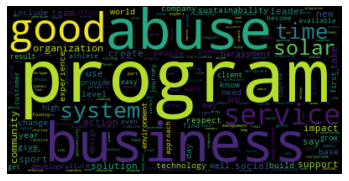

In [ ]:
vocab = vectorized.vocabulary_
# select some rows according to the index of the rows
selected_index = df_data_bcorp[df_data_bcorp['state'] == 'Alberta'].index
selected_DTM = freq_term_DTM[selected_index]
####
data_WC = prepare_data_for_WC(selected_DTM, vocab)
wordcloud = WordCloud().generate_from_frequencies(data_WC)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In the following chunk of code, we compute the total number of words contained in each company's `text_cleaned` column, and we show the differences between sectors.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

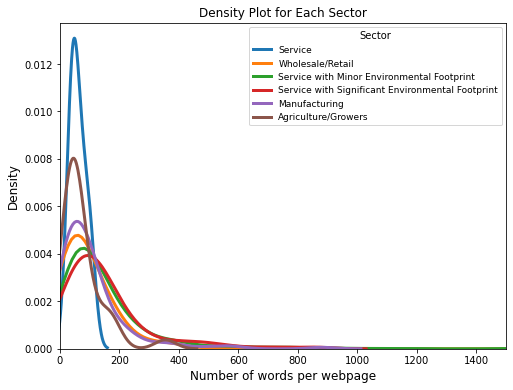

In [23]:
# Creating a new column 'number_words_webpages' with the number of words for each article generated with the "apply" function apply the len to all the column   
df_data_bcorp['number_words_webpages'] = df_data_bcorp["text_cleaned"].apply(len)
# Setting the parameters of the graph that we will plot below
for sector in df_data_bcorp.sector.unique():
  # Create a subset with the different sectors
  subset = df_data_bcorp[df_data_bcorp.sector == sector]
  sns.distplot(subset['number_words_webpages'],
               hist=False,# Boolean value to plot a (normed) histogram.
               kde=True, # Boolean value to plot a gaussian kernel density estimate
               kde_kws={'linewidth': 3},
               label=sector)
# Plot the graph with the distribution of the number of words for each webpages in the different sectors
plt.legend(prop={'size': 9}, title='Sector')
plt.title('Density Plot for Each Sector')
plt.figsize=(12, 10)
plt.xlabel('Number of words per webpage', size=12)
plt.ylabel('Density', size=12)
plt.xlim(0, 1500)
plt.gcf().set_size_inches(8, 6)
plt.show()

---
Here, we execute the same operation, but subsetting only those companies which are in two specific sectors: "Service with Minor Environmental Footprint" and "Service with Significant Environmental Footprint".


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


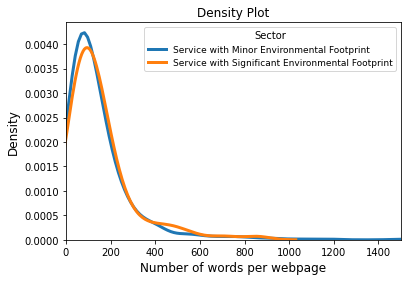

In [21]:
#Selecting the industry sector to examinate
lst_env_sector=["Service with Minor Environmental Footprint", "Service with Significant Environmental Footprint"]
######Setting the parameters of the graph to plot
for sector in lst_env_sector:
  # Create a subset with the two sectors
  subset = df_data_bcorp[df_data_bcorp.sector == sector]
  sns.distplot(subset['number_words_webpages'], 
               hist=False, 
               kde=True, 
               kde_kws={'linewidth': 3}, 
               label=sector)
##Plotting the graph of the two industry sector under exam
plt.legend(prop={'size': 9}, title='Sector')
plt.title('Density Plot')
plt.xlabel('Number of words per webpage', size=12)
plt.ylabel('Density', size=12)
plt.xlim(0, 1500)
plt.figsize=(12, 10)
plt.show()

Here, we execute  the same operation but considering the `country` and a specific `sector`.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


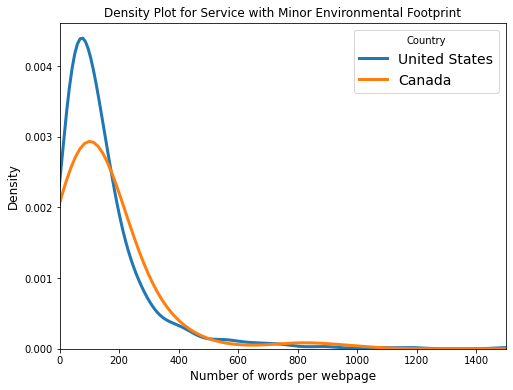

In [19]:
#Selecting the sector to represent in the plot
sector_to_look = "Service with Minor Environmental Footprint"
data_MEF=df_data_bcorp[df_data_bcorp['sector']==sector_to_look]

for country in data_MEF.country.unique():
  # Create a subset with the different country
  subset = data_MEF[data_MEF.country == country]
  sns.distplot(subset['number_words_webpages'], 
               hist=False, 
               kde=True, 
               kde_kws={'linewidth': 3}, 
               label=country)
#Plot the graph highlighting the differences between the countries of the selected sector
plt.legend(prop={'size': 14}, title='Country')
plt.title(f'Density Plot for {sector_to_look}')
plt.xlabel('Number of words per webpage', size=12)
plt.ylabel('Density', size=12)
plt.xlim(0, 1500)
plt.gcf().set_size_inches(8, 6)
plt.show()

<a id="analysis"></a>
# Section 3: Analysis 

In this section, we run the *k-means* cluster algorithm on the dataset.

## 3.1 Document clustering


As mentioned in section 1, the goal of the *k-means* cluster is to group rows in a homogeneous set of clusters minimizing the pairwise squared deviations of the data points in the same cluster. Below, an example of a *k-means* clusters with *k* = 5

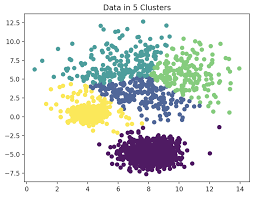

(https://www.ml-science.com/k-means-clustering)


In the chuck below, we execute the clustering algorithm on the Tf-IDF matrix (`tfidf_DTM`), choosing `n_clusters`
 = `20` to generate 20 clusters. 

In [27]:
result_kmeans = Clustering_kmeans(DTM = tfidf_DTM, # Matrice to pass under sklearn classifiers
                               reduce_lsa = True,# a SVD is executed on the DTM before to execute the clustering
                               n_comp_lsa= 300,# Number of component to keep after SVD on DTM.
                               n_clusters = 20,# Number of cluster represented in the plot
                               random_state = 8426, # Determines random number generation for centroid initialization
                               max_iter = 1000, #Maximum number of iterations of the k-means algorithm for a single run
                               n_init = 100,# Number of time the k-means algorithm will be run with different centroid seeds
                               tol = 0.0001,# Relative tolerance with regards to Frobenius norm of the difference in the cluster centers of two consecutive iterations to declare convergence
                               init = "k-means++")# selects initial cluster centers for k-mean clustering in a smart way to speed up convergence

Explained variance of the SVD step: 74%
For n_clusters = 20;	 The silhouette_avg is : 0.0303365


Count the number of documents for each cluster.

In [28]:
# Count the Number of Occurrences in a Python list using Counter
from collections import Counter
Counter(result_kmeans.labels_)

Counter({0: 66,
         1: 49,
         2: 98,
         3: 40,
         4: 66,
         5: 27,
         6: 68,
         7: 30,
         8: 24,
         9: 63,
         10: 19,
         11: 19,
         12: 67,
         13: 27,
         14: 23,
         15: 42,
         16: 38,
         17: 239,
         18: 34,
         19: 71})

## 3.2 Plot data grouped by clusters

In this subsection, we plot the result of the clustering in a 2D representation

In [ ]:
plot_data_by_cluster(DTM = tfidf_DTM,
                     cls_kmeans = result_kmeans,
                     figsize = (16,10))

## 3.3 Wordcloud by cluster

We use Tf-IDF weights to plot the most important words for each cluster.

In [ ]:
wordcloud_par_cluster(wordcloud = WordCloud(), # A WordCloud function. 
                      DTM = tfidf_DTM,# A Document-Term Matrix 
                      cls_kmeans = result_kmeans, # Insert the result of a kmeans clustering
                      vocab = vectorized.vocabulary_, # a vocabulary from scikitlearn vectorizer
                      first_n_words=10,#  It indicates how many words to print
                      figsize=(12, 10),
                      fontsize=32,
                      plot_wordcloud = False, # Switch to True if you want to plot wordclouds
                      lst_clust = [], # Insert a list of integer to get info about a selected number of cluster. If you leave an empty list, info of all the clustrs are shown
                      title_in_plot = "Clust_")

## 3.4 Statistics for Lexical Keyness


A complementary analysis of the sum of Tf-IDF weights is <font color='f28c00'>keyness</font>.  This analysis gives the statistical significance of a keyword's frequency, in a given corpus, relative to a reference corpus.

In our case, we compare all the words of the documents of a cluster against the other docuemnts of the corpus. The Log-likelihood Ratio return the lexical specificity of the word for the target cluster. 

Keyness is generally sensitive to low frequency. For this reason we can also sort Log-likelihood Ratio after having removed words with low frequency.

A short description of the method is accessible [here](https://alvinntnu.github.io/NTNU_ENC2036_LECTURES/keyword-analysis.html#statistics-for-keyness).

In [35]:
df_keyness = lexical_keyness(DTM = freq_term_DTM, # DTM
                             cls_kmeans = result_kmeans, # Fill with the result of a kmeans clustering
                             vocabulary_vectorize = vectorized.vocabulary_, # 
                             n_cluster = 13) # Number of cluster for which look at the keyness of words
# Pick a frequency threshold to reduce words having low frequency
frequency_threshold = 10 # Insert your frequency threshold as integer
df_keyness[df_keyness['tot'] > frequency_threshold]['Log-likelihood Ratio'].sort_values(ascending=False)

reduction          5.221001
emission           4.893726
sustainability     4.686883
greenhouse         4.544472
forest             4.462009
                    ...    
education        -25.131337
mean             -25.140215
always           -25.183805
website          -25.299282
healthy          -25.383944
Name: Log-likelihood Ratio, Length: 2063, dtype: float64

## 3.5 Cross-Analysis of the cluster results with the metadata

We can use metadata to explore clusters created by the Kmeans. 

In this subsection, we analyze the `overall_score` and the `sector` of the companies for each cluster. 

In the chunk below, we prepare data for analysis, by assigning clustering labels to each row in our original dataset. 

In [38]:
#Create a new column to assign to each company the correspondant cluster
df_data_bcorp['cluster_labels'] = result_kmeans.labels_

---
The following chunk of code calculates the mean of the `overall_score` of a specific cluster of documents

In [36]:
# We compute the .mean() of the `overall_score`for cluster 10
df_data_bcorp.loc[result_kmeans.labels_== 10, 'overall_score'].mean()

99.26842105263158

---
The chunk of code below creates a box plot based on the `overall_score` for each cluster

In [ ]:
df_data_bcorp.boxplot('overall_score', by='cluster_labels', figsize=(12, 8))

---
In the next chunk of code, for comparing reasons, we create a box plot for each sector based on the `overall_score`.

In [ ]:
df_data_bcorp.boxplot('overall_score', by='sector', figsize=(24, 8))

---
Then, we calculate the mean of the `overall_score` for each cluster

No handles with labels found to put in legend.


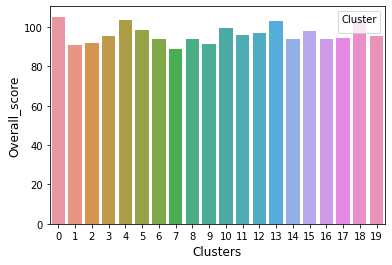

<Figure size 864x720 with 0 Axes>

In [44]:
import numpy as np
# Prepare data
mean_score_cluster = df_data_bcorp[['cluster_labels','overall_score']].groupby('cluster_labels').mean()
df_data_bcorp[['cluster_labels','overall_score']].groupby('cluster_labels')
######Setting the parameters of the graph to plot
sns.barplot(x=mean_score_cluster.index, y=mean_score_cluster["overall_score"])
##Plotting the graph of the two industry sector under exam
plt.legend(prop={'size': 9}, title='Cluster')
# plt.title('Density Plot for Each Author')
plt.xlabel('Clusters', size=12)
plt.ylabel('Overall_score', size=12)
plt.figure(figsize=(12, 10))
plt.show()

---
Here, we extract the median of the `overall_score` for each cluster

In [ ]:
df_data_bcorp[['cluster_labels','overall_score']].groupby('cluster_labels').median()

---
Below, we generate a cross table of `sector` and `cluster_labels`. We use a ratio instead of simple frequency. Thus, we get the proportion of the sector for each cluster.

In [ ]:
nominal_metadata_to_analyse = 'sector'
df_test = pd.DataFrame(columns=set(df_data_bcorp[nominal_metadata_to_analyse])) 
for c_t_ in range(result_kmeans.n_clusters):
    df_test.loc[c_t_] = df_data_bcorp.loc[result_kmeans.labels_== c_t_, nominal_metadata_to_analyse].value_counts()
df_test = df_test.fillna(0)
#
# Ratio
for col in df_test.columns:
    df_test[col] = df_test[col] / df_test[col].sum() * 100

df_test = df_test.round(2)
df_test

## 3.6 Retrieve most representatives documents by cluster

In this subsection, we retrieve the most representative documents for each cluster.

In the chunk below, we prepare data computing *cosine similarity* between the *centroid*  of each cluster and all documents it contains.

In [47]:
from sklearn.metrics.pairwise import cosine_similarity
df_data_bcorp['Cosine_of_related_cluster'] = 0
for idx, centroid in enumerate(result_kmeans.cluster_centers_):
    idx_cluster = result_kmeans.labels_ == idx
    similarity = cosine_similarity(result_kmeans.DTM_[idx_cluster], centroid.reshape(1, -1)).flatten()
    df_data_bcorp.loc[idx_cluster, 'Cosine_of_related_cluster'] = similarity 

---
Below, we print most representatives documents for a specific cluster 

In [ ]:
## chose cluster number to analyse
n_clust = 5
df_data_bcorp[df_data_bcorp["cluster_labels"] == n_clust].sort_values(by='Cosine_of_related_cluster', ascending= False)[['company_name','Cosine_of_related_cluster',"text_web_page"]]

---
The following function allows printing a limited number of segments extracted from all those documents which are closer to a target cluster. In other terms, it allows to return some **segments** of the most relevant documents for a target cluster. 

You need to correctly fill all the arguments of the following function. If you're a beginner with Python, ask help to monitors.

In [ ]:
print_KWIC_clusters(data = df_data_bcorp  , # data used for analysis 
                    DTM = tfidf_DTM, # tfidf Matrix used for clustering
                    cls_kmeans = result_kmeans, # Clustering results
                    vocab = vectorized.vocabulary_, # Vocabulary of the vectorization
                    k_to_analyze = 5, # Cluster to analyze
                    n_words = 3, # Number of words to be used for the Keyword In Context extraction. These will be words with the higher tfidf values for the target cluster
                    n_segms_per_docuemnt = 5, # Number of segemtn to print for each document
                    n_documents = 3, # Number of documents closer to centroid to use for KWIC extraction
                    left_windows = 50, # Left window of character
                    right_windows = 50) # Rigth window of character

<a id="exercie"></a>
# Section 4: Exercise

In this section participants challenge themselves to reproduce the steps made in sections 1, 2 and 3. The exercise is completed in group mode. Each group **will present the final result of their work** in no more than 5 minutes at the end of the workshop. Below, we describe the steps of the exercise.

In the first phase (10 minutes maximum), each group has to choose a sub-corpus of the whole corpus using metadata, such as `sector`, `industry`, `country`, `state` or `city`. They can choose a combination of them, for example, a sub-corpus containing companies of the agriculture sector of Canada. For analysis of textual data, groups can choose between two different textual data field : 
1. `text_web_page`, which contains data collected by WaybackMachine and used for the first part of this workshop 
2. `description`, which contain a short description of companies, provided by them to BCorp organization.

In the second phase (40 minutes), groups will pass through all the analytical steps, from section 4.2 to section 4.8. In those sections, **_we provide you all the necessary chunks of code_** in order to succeed the exercise. In the most of these chunks of code, you only need to fill some empty parts, which are indicated with the three points `...`. Occasionally, you could modify other parts of the code (for intermediate-level participants only).

In the third phase (10 minutes), groups have to complete the interpretation of the results and prepare one or two points they choose to show to the class. 

Below, we show the two textual field you can choose for the exercise.

In [ ]:
df_data_bcorp["description", "text_web_page"]

## 4.1 Select your sub-corpus

Look at metadata and, after discussion with members of your group, select the sub-corpus you want to explore. Be sure to have enough companies in your sub-corpus (around 100 at least). 

Don't be afraid to ask for help to your monitor for this part!! 😀

The following chunk give you an example of subsection. ⚡Pay attention the following subsection does not contain enough documents to work.

Below, we provide an example of subsection of rows, regarding to the sector. We assign the result of the subsection to a new dataset named `df_data_bcorp_selection`.

In [ ]:
df_data_bcorp_selection = df_data_bcorp[df_data_bcorp["sector"]=='service']

## 4.2 Morphological Analysis
For the morphological analysis, you can choose between two textual data fields: 

1. `text_web_page`
2. `description`

Fill the empty part `...` with the chosen textual column of the subset created above (`df_data_bcorp_selection`).

In [ ]:
df_data_bcorp_selection['text_preprocessed'] = list(nlp.pipe(df_data_bcorp_selection[...], # Fill the empty part
                                                             disable = ["tok2vec",'parser','ner']))

## 4.3 Filter lexical feature
You can add words of your choice to the stopword list. This is not necessary to succeed the exercise, but can help if you want to remove non-meaningful words which appear later in your analysis.

In [ ]:
# download default list of stopword
nltk.download('stopwords')
# add custum words to the stopword list
stopwords_list = set(stopwords.words('english') + ['would'])

---
Fill the empty part `...` with the list of POS tag you want to include in your feature selection

In [ ]:
# initialize empty list
text_cleaned = []
spacy_lst_object = []
# iterate over each preprocessed document
for idx, row in df_data_bcorp_selection.iterrows(): 
    # keep only the lemma for each token which has been tagged as one of these POS tags ["ADV", "ADJ", "NOUN", "VERB"]
    text = [w.lemma_.lower() for w in row['text_preprocessed'] if w.pos_ in [...] # Fill the empty part here
            # AND its lemma IS NOT contained in the stopwords_list AND its lemma has more then 1 character
            and w.lemma_.lower() not in stopwords_list and len(w.lemma_.lower())> 1]
    text_cleaned.append(text)
   
df_data_bcorp_selection["text_cleaned"] = text_cleaned
#df_data["text_spacy_prepross"] = spacy_lst_object


## 4.4 Vectorization of lexical features
For this step, you have to choose the values for `min_df` and `max_df` arguments. Fill the empty part `...`. At the end of the next chunk of code, we generate the frequency matrix and the Tf-IDF matrix. They are named as follows: 
1. `freq_term_DTM_selection`
2. `tfidf_DTM_selection`

The dimensions of the `freq_term_DTM_selection` is printed in order to give you an idea of the number of terms you are keeping in your matrix.

Fill the empty parts `...`.

In [ ]:
def identity_tokenizer(text):
    return text

# Transforming the word in frequencies
vectorized = CountVectorizer(lowercase = False, # Convert all characters to lowercase before tokenizing
                             min_df = ..., # Ignore terms that have a document frequency strictly lower than the given threshold 
                             max_df = ..., # Ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words)
                             stop_words = stopwords_list, # Remove the list of words provided
                             ngram_range = (1, 1), # Get the lower and upper boundary of the range of n-values for different word n-grams or char n-grams to be extracted
                             tokenizer=identity_tokenizer) # Override the string tokenization step while preserving the preprocessing and n-grams generation steps
#
freq_term_DTM_selection = vectorized.fit_transform(df_data_bcorp_selection["text_cleaned"])
tfidf = TfidfTransformer(norm='l1')
tfidf_DTM_selection = tfidf.fit_transform(freq_term_DTM_selection)
#
freq_term_DTM_selection

## 4.5 Descriptive statistics

Get the wordcloud of most frequent words your sub-corpus. Fill the empty parts `...` with the frequency matrix you generated in the previous chunk.

In [ ]:
vocab = vectorized.vocabulary_
data_WC = prepare_data_for_WC(..., # Fill with the frequency matrix
                              vocab) 
# Create and generate a word cloud image:
wordcloud = WordCloud().generate_from_frequencies(data_WC)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 4.6 Document clustering

Here, we execute the clustering algorithm. Fill the empty parts `...`. We generate the variable `kmeans_result_selection` containing the result of the clustering.

In [ ]:
kmeans_result_selection = Clustering_kmeans(DTM = ..., # Fill with the tfidf matrix
                               reduce_lsa = True,
                               n_comp_lsa= 300,
                               n_clusters = ..., # choose the number of clusters you want to generate
                               random_state = 8426,
                               max_iter = 1000,
                               n_init = 100,
                               tol = 0.0001,
                               init = "k-means++")

## 4.7 Wordcloud by cluster

We analyze the most important words for each cluster generate above. We use the Tf-IDF matrix for this operation.
Fill the empty parts `...`

In [ ]:
wordcloud_par_cluster(WordCloud(), # 
                      ..., # Fill with the tfidf matrix of your sub-corpus
                      ..., # Fill with the results of the clustering
                      vectorized.vocabulary_, # 
                      first_n_words = ...,
                      figsize = (12, 10),
                      fontsize = 32,
                      plot_wordcloud = False, #
                      lst_clust = [], #
                      title_in_plot = "Clust_") #

## 4.8 Read most relevant document by cluster

Get the most representative segments of each cluster. 
Fill the empty parts `...`.


In [ ]:
print_KWIC_clusters(data = ...  , # data used for analysis 
                    DTM = ..., # tfidf Matrix used for clustering
                    cls_kmeans = ..., # Clustering results
                    vocab = vectorized.vocabulary_, # Vocabulary of the vectorization
                    k_to_analyze = ..., # Cluster to analyze
                    n_words = 3, # Number of words to be used for the Keyword In Context extraction. These will be words with the higher tfidf values for the target cluster
                    n_segms_per_docuemnt = ..., # Number of segemtn to print for each document
                    n_documents = 3, # Number of documents closer to centroid to use for KWIC extraction
                    left_windows = 50, # Left window of character
                    right_windows = 50) # Rigth window of character

## 4.9 Complete the exercise

Prepare your presentation for plenary session. You have 5 minutes to present one or two elements of your group work. 